## **CASO 2 AGRUPAMIENTO: ENTIDAD FINANCIERA**

Ustedes hacen parte del equipo de datos del área de mercadeo de una entidad financiera. El equipo comercial quiere diseñar una nueva estrategia de atracción para cerrar clientes de una segunda tarjeta de crédito. Teniendo en cuenta que el comportamiento del cliente es importante a la hora de entender el posible cierre de un negocio ustedes deciden diseñar un modelo de datos que permita establecer estos diferenciales para la estrategia.


En general el equipo de mercadeo cree que la mejor manera de repartir a los clientes es en **4 grupos**. Determine si esta opinión es razonable a la luz del modelamiento y de las métricas de desempeño.

## Metodología ASUM-DM

1. Entendimiento del Negocio: La entidad financiera busca atraer clientes para la aquisición de una segunda tarjeta de crédito, el objetivo es comprender las diferencias en el comportamiento de los clientes para brindar un mejor servicio a la hora de cerrar un negocio.

2. Enfoque Analítico: Diseñar un experimento que permita agrupar a los clientes en una cantidad de grupos beneficios para identificar los comportamientos diferenciadores.

3. Requerimiento de datos: Datos bancarios de los clientes

4. Recolección de datos:

    <img src="../Computación Científica/Datasets/Datos_Entidad_Bancaria.png" alt="Datos EB" width="500" />

5. Entendimiento de datos:
    - Identificar datos nulos
    - Exploración univariada de los datos 
    - Exploración multivariada de los datos
    - Identificación de correlación y multicolinealidad

In [2]:
# Tratamiento estructurado de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Advertencias
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../Computación Científica/Datasets/datos_caso_2.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Verificación de la existencia de datos nulos

In [10]:
data.isnull().sum() / len(data) * 100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

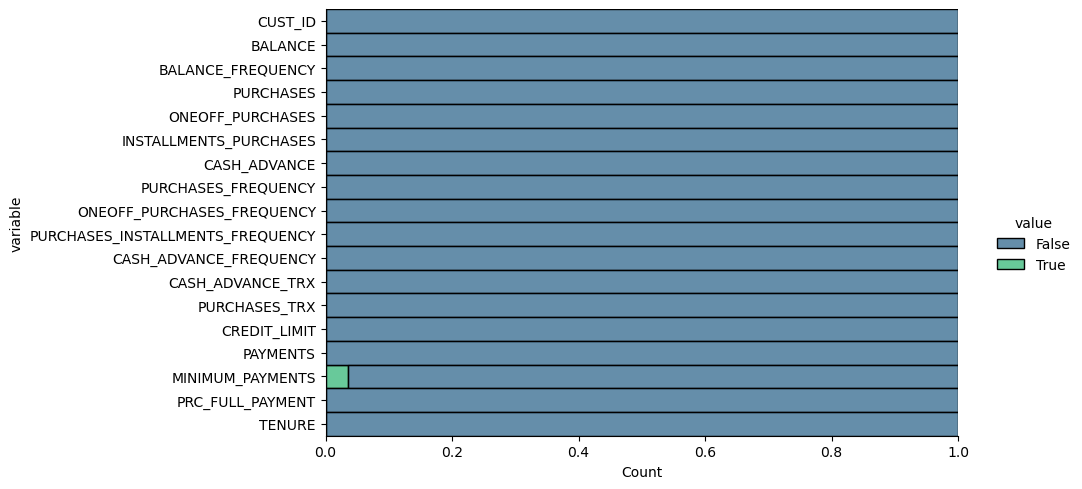

In [5]:
# data.isnull().sum()
data.isnull().melt().pipe(lambda df: sns.displot(data=df, y = 'variable', palette='viridis', hue='value', multiple='fill', aspect=2))
plt.show()

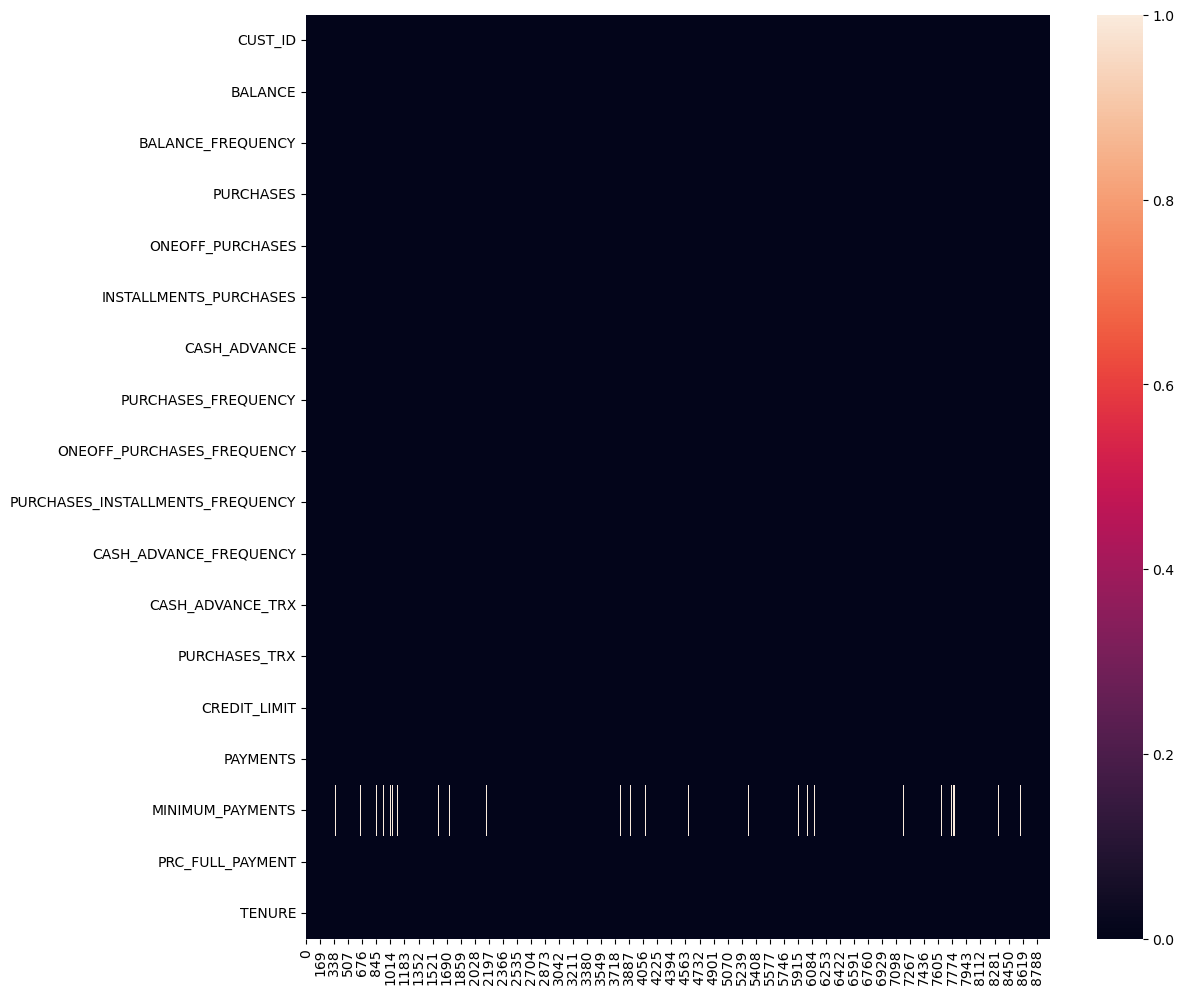

In [6]:
plt.figure(figsize=(12, 12))
data.isnull().transpose().pipe(lambda df: sns.heatmap(data = df))
plt.show()

**ANÁLISIS:** los datos nulos pertenecientes a MINIMUM_PAYMENTS están repartidos a lo largo de todos los registros

### Exploración Univariada de los datos

**HISTOGRAMAS DE FRECUENCIA**

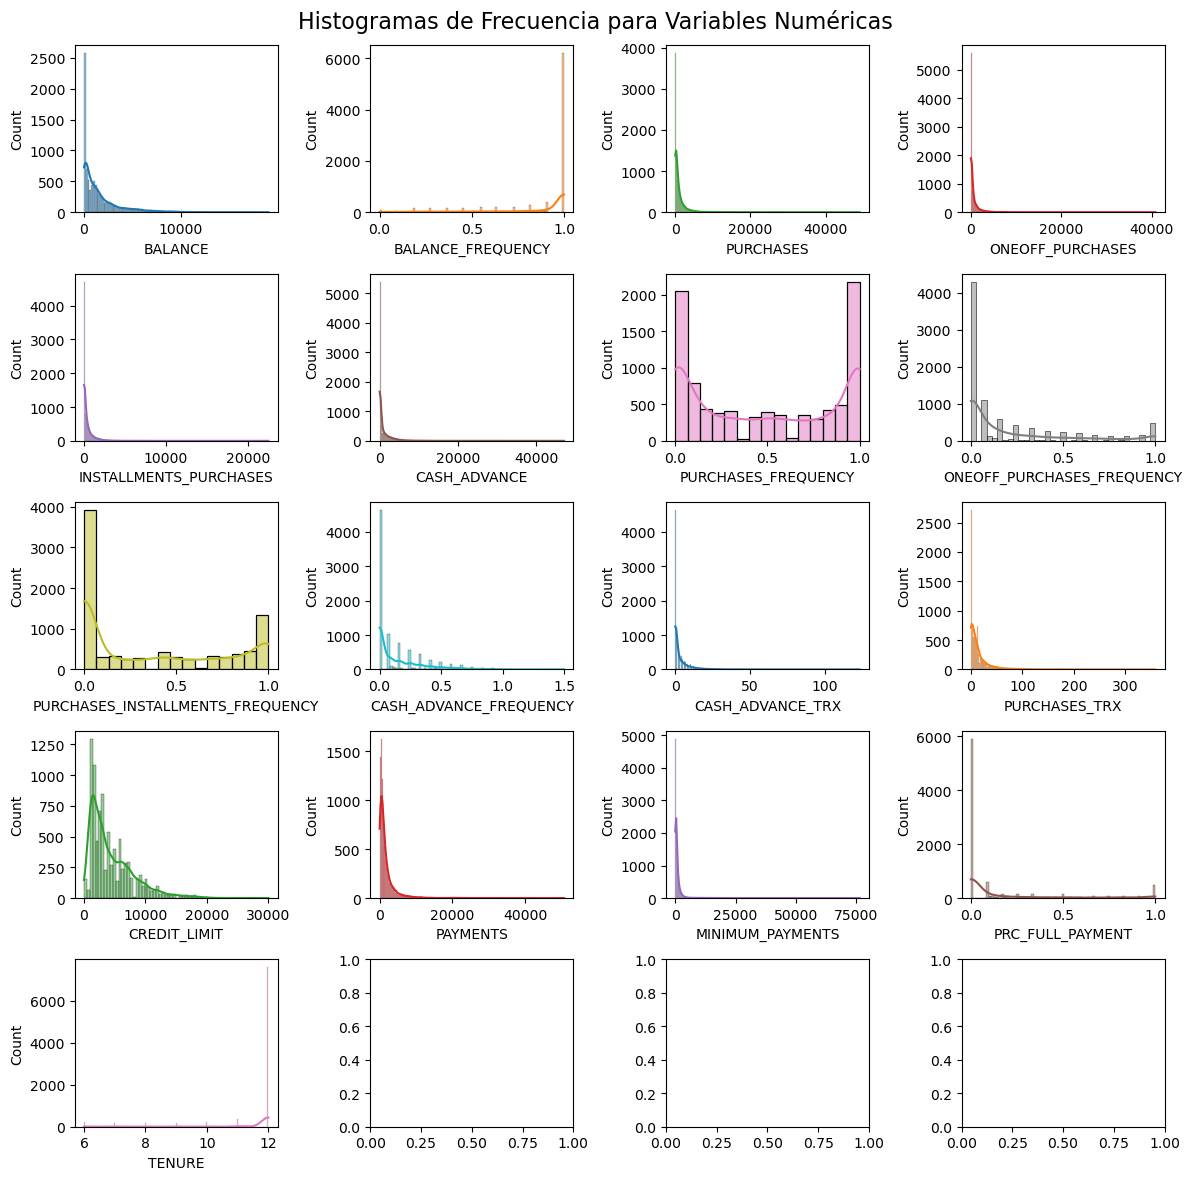

In [7]:
fig, ax = plt.subplots(5, 4, figsize=(12, 12))
ax = ax.flat
num_col = data.select_dtypes(include=['float64', 'int64']).columns

for i, col in enumerate(num_col):
    sns.histplot(
        data = data,
        x = col,
        kde = True,
        color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'],
        ax = ax[i]
    )

fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Histogramas de Frecuencia para Variables Numéricas', fontsize=16)
plt.show()

**ANÁLISIS**

- BALANCE: **LogN** -> Dinero actúal de cada cliente
- BALANCE_FREQUENCY (Relación): **0-1 (Sesgada a la izquierda)** -> Riesgo del cliente **(Tiene un mayor punto de frecuencia hacia 1, lo que indica que hay una mayor frecuencia de reporte de saldo)**
- PURCHASES: **LogN** -> Monto de compras realizado
- ONEOFF_PURCHASES: **LogN** -> Máximo de compras realizado en una cuota
- INSTALLMENTS_PURCHASES: LogN -> Monto de compras realizadas a crédito
- CASH_ADVANCE: LogN -> Avances en efectivo
- PURCHASES_FREQUENCY (Calificación): **0-1 (Bimodal en los extremos)** -> Frecuencia de compras **(Hay un grupo de clientes que compra con frecuencia y otro que no se caracteríza por eso)**
- ONEOFFPURCHASESFREQUENCY (Calificación): **0-1 (Sesgada hacia la derecha con un pequeño pico en 1)** -> Frecuencia de compras a una sola cuota
- PURCHASESINSTALLMENTSFREQUENCY (Calificación): **0-1 (Sesgada hacia la derecha con un pequeño pico en 1)** -> Frecuencia de compras a crédito
- CASHADVANCEFREQUENCY (Calificación): **0-1 (LogN)** -> Frecuencia de avances **(HAY VALORES MAYORES A 0-1, NO TIENE LÓGICA CON LOS DATOS)** -> Se ignora
- CASHADVANCETRX: **LogN** -> Número de transacciones realizadas con avances
- PURCHASES_TRX: **LogN** -> Número de transacciones de compras hechas
- CREDIT_LIMIT: **LogN** -> Límite de crédito
- PAYMENTS: **LogN** -> Monto de pagos
- MINIMUM_PAYMENTS: **LogN** -> Pagos completos hechos por el usuario **(RECORDAR VALORES NULOS)**
- TENURE: **Sesgada hacia la izquierda** -> Tenencia de tarjetas de crédito

### Factor de Correlación

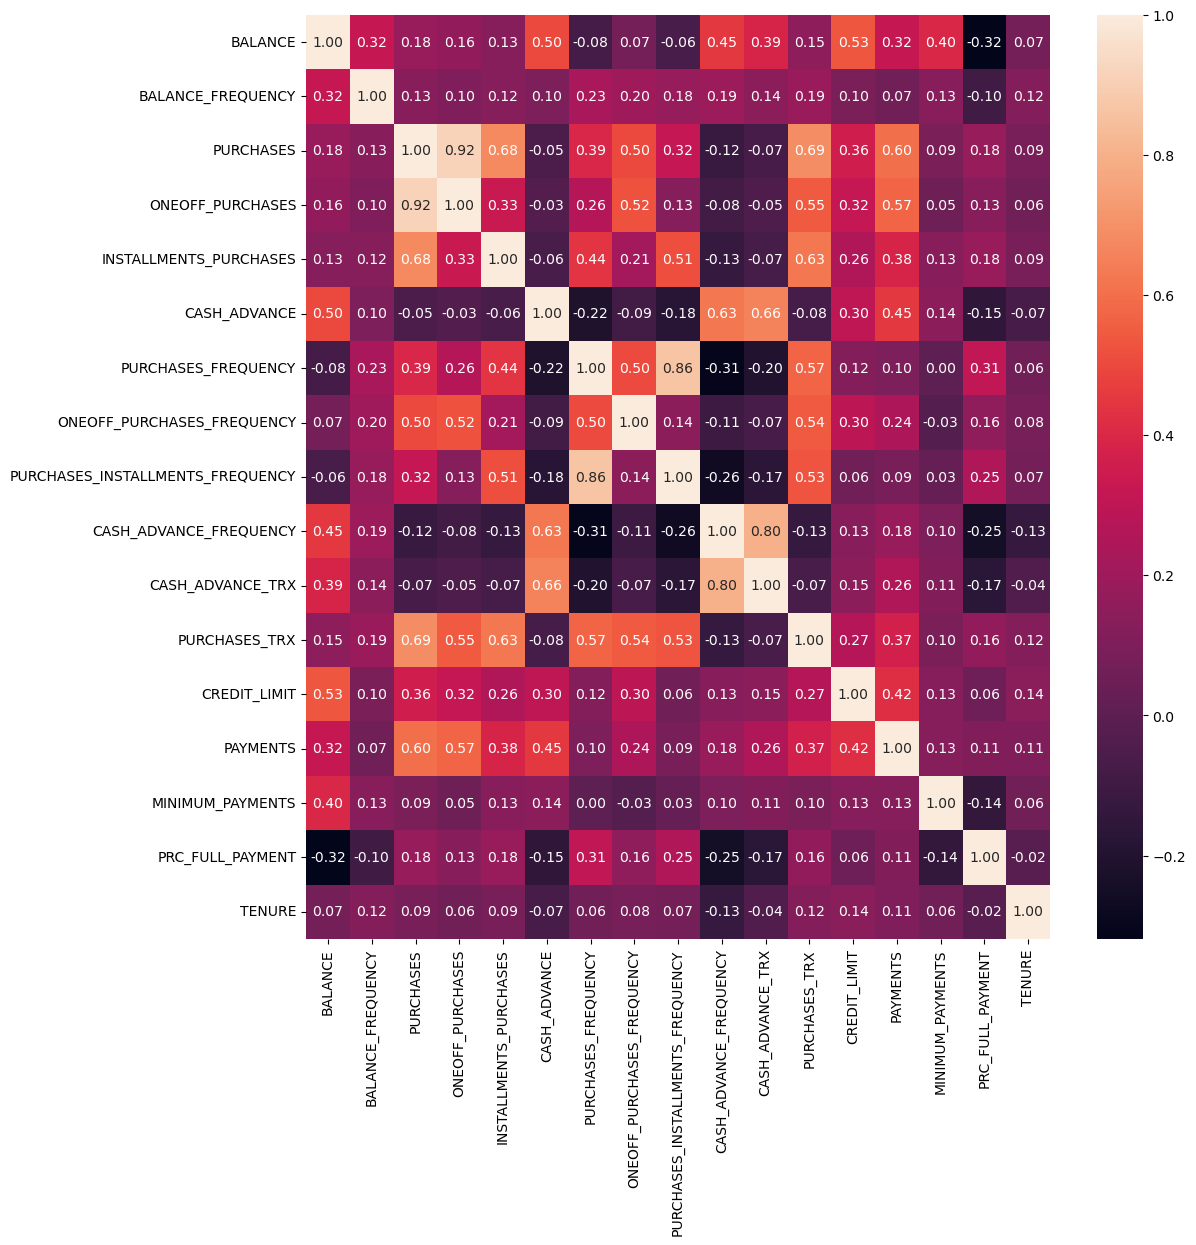

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(data = data.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

**Análisis**

Se logró identificar multicolinealidad en 3 casos donde se visualiza una correlación fuerte (ro > 0.75)

- PURCHASES y ONEOFFPURCHASES (0.92): Se elimina PURCHASES debido a la correlación que se visualiza con respecto a las demás variables
- PURCHASES_FREQUENCY y PURCHASES_INSTALLMENTS_FREQUENCY (0.86): Se elimina PURCHASES_FREQUENCY debido a la correlación que se visualiza con respecto a las demás variables
- CASH_ADVANCE_FREQUENCY y CASH_ADVANCE_TRX (0.80): Se elimina CASH_ADVANDE_FREQUENCY debido a la correlación que se visualiza con respecto a las demás variables

### Preparación de los datos

#### Eliminación de registros nulos

- MINIMUM_PAYMENTS (3.49%)
- CREDIT_LIMIT (0.01%)

In [15]:
data_clean = data.dropna(subset=['MINIMUM_PAYMENTS', 'CREDIT_LIMIT'])
data_clean

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#### Eliminación de las variables que se IGNORAN

In [16]:
data_mod = data_clean.drop(columns=['CUST_ID', 'PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'])
data_mod

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,0.00,95.40,0.000000,0.000000,0.083333,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,0.00,1333.28,0.000000,0.000000,0.583333,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,0.00,0.000000,0.166667,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,0.00,291.12,0.000000,0.000000,0.833333,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,0.00,144.40,0.000000,0.000000,0.666667,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,2,0,500.0,52.549959,55.755628,0.250000,6


In [17]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   ONEOFF_PURCHASES                  8636 non-null   float64
 3   INSTALLMENTS_PURCHASES            8636 non-null   float64
 4   CASH_ADVANCE                      8636 non-null   float64
 5   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 6   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 7   CASH_ADVANCE_TRX                  8636 non-null   int64  
 8   PURCHASES_TRX                     8636 non-null   int64  
 9   CREDIT_LIMIT                      8636 non-null   float64
 10  PAYMENTS                          8636 non-null   float64
 11  MINIMUM_PAYMENTS                  8636 non-null   float64
 12  PRC_FULL_PA

#### Transformación

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [35]:
num_col = data_mod.select_dtypes(include=['int64', 'float64']).columns.to_list()

numtrans = Pipeline(steps= [('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[
    ('num', numtrans, num_col)],
    remainder='passthrough'
)

preprocessor.fit(data_mod)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['BALANCE', 'BALANCE_FREQUENCY',
                                  'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                                  'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
                                  'PURCHASES_INSTALLMENTS_FREQUENCY',
                                  'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                                  'CREDIT_LIMIT', 'PAYMENTS',
                                  'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
                                  'TENURE'])])

In [36]:
data_pre = preprocessor.transform(data_mod)
data_pre

array([[2.14779454e-03, 8.18182000e-01, 0.00000000e+00, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.89682603e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 0.00000000e+00, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.68208163e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]], shape=(8636, 14))

In [38]:
labels = np.concatenate([num_col])
data_pro = pd.DataFrame(data_pre, columns=labels)
data_pro

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.000000,0.004240,0.000000,0.000000,0.083333,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.136685,0.000000,0.000000,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.018968,0.000000,0.000000,1.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
3,0.042940,1.000000,0.000393,0.000000,0.000000,0.083333,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
4,0.095038,1.000000,0.000000,0.059257,0.000000,0.000000,0.583333,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,0.000308,0.500000,0.000513,0.000000,0.000000,0.166667,0.000000,0.00000,0.002793,0.015025,0.001155,0.000569,0.000000,0.0
8632,0.001496,1.000000,0.000000,0.012939,0.000000,0.000000,0.833333,0.00000,0.016760,0.031720,0.006418,0.000640,0.500000,0.0
8633,0.001229,0.833333,0.000000,0.006418,0.000000,0.000000,0.666667,0.00000,0.013966,0.031720,0.001601,0.001078,0.250000,0.0
8634,0.000707,0.833333,0.000000,0.000000,0.000776,0.000000,0.000000,0.01626,0.000000,0.015025,0.001035,0.000729,0.250000,0.0


### Construcción del Modelo

#### KMeans

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

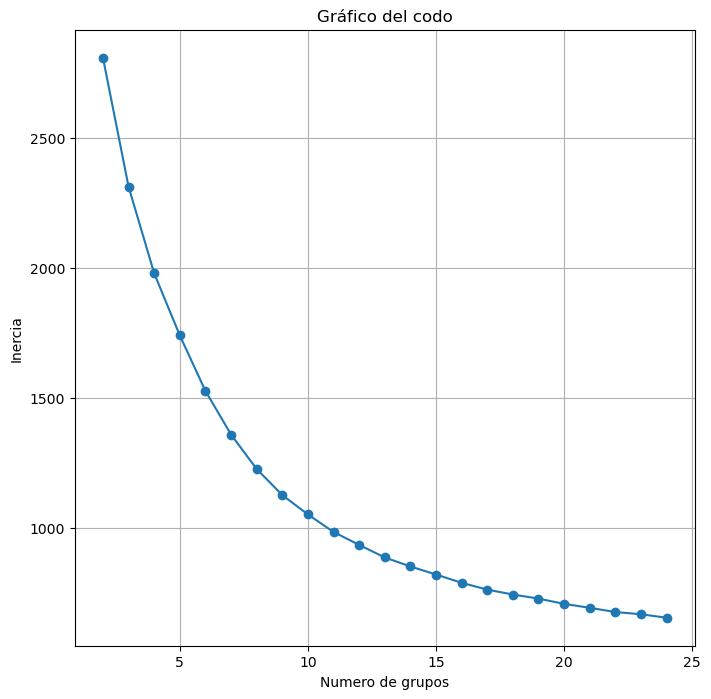

In [40]:
# Buscar el valor de K
range_k = range(2, 25)
inertia = []

for n_clusters in range_k:
    kmeans_model = KMeans(n_clusters=n_clusters,
                           n_init=20,
                           random_state=123
                           )
    kmeans_model.fit(data_pro)
    inertia.append(kmeans_model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range_k, inertia, marker = 'o')
plt.title('Gráfico del codo')
plt.xlabel('Numero de grupos')
plt.ylabel('Inercia')
plt.grid()
plt.show()

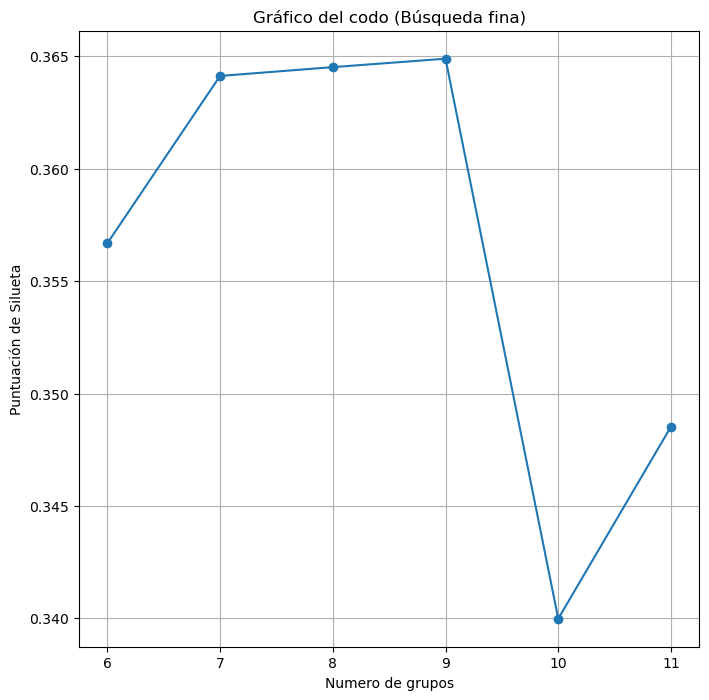

In [42]:
# Búsqueda fina de k
range_k2 = range(6,12)
sil_score = []

for n_clusters in range_k2:
    kmeans_model = KMeans(n_clusters=n_clusters,
                           n_init=20,
                           random_state=123
                           )
    kmeans_model.fit(data_pro)
    cluster_label = kmeans_model.fit_predict(data_pro)
    sil_avg = silhouette_score(data_pro, cluster_label)
    sil_score.append(sil_avg)
    
plt.figure(figsize=(8,8))
plt.plot(range_k2, sil_score, marker = 'o')
plt.title('Gráfico del codo (Búsqueda fina)')
plt.xlabel('Numero de grupos')
plt.ylabel('Puntuación de Silueta')
plt.grid()
plt.show()

**Análisis**

- Utilizando el método del codo se determinó mediante la puntuación de silueta que son **9 grupos**

In [43]:
kmeans_model_final = KMeans(n_clusters=9, 
                            n_init=20,
                            random_state=123
                            )
kmeans_model_final.fit(data_pro)

KMeans(n_clusters=9, n_init=20, random_state=123)

#### Jerárquico Aglomerativo

In [44]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [45]:
#Función para dibujar el dendrograma
def dibujarDendrograma(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
 
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
 
    # Plot
    dendrogram(linkage_matrix, **kwargs)

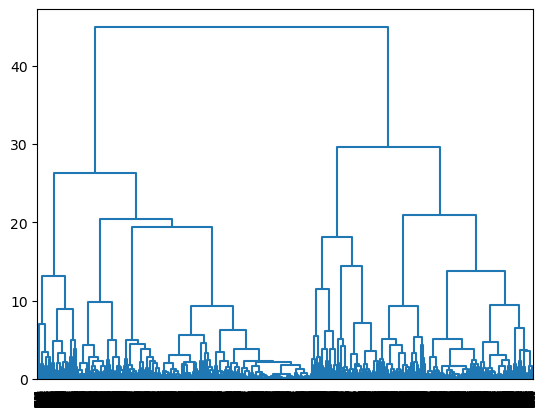

In [46]:
#Varianza
h_clust_ward = AgglomerativeClustering(metric='euclidean',
                                       linkage='ward',
                                       distance_threshold=0,
                                       n_clusters=None
                                       )
h_clust_ward.fit(X = data_pro)
dibujarDendrograma(h_clust_ward, color_threshold=0)

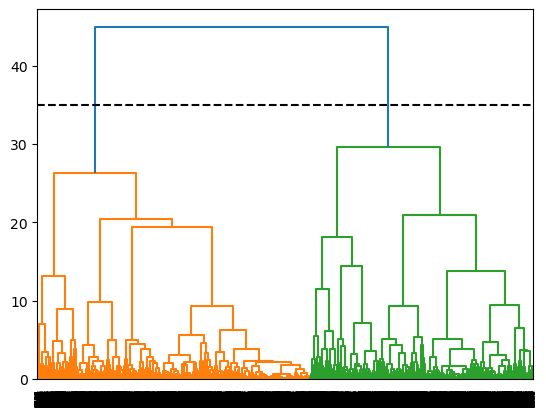

In [48]:
dendograma_prun = 35
dibujarDendrograma(h_clust_ward, color_threshold=dendograma_prun)
plt.axhline(y=dendograma_prun, color='black', linestyle='--')
plt.show()

**Análisis**

- Se traza una línea a partir de la línea más grande para hacer el punto de corte, a partir de esto se determinan **2 grupos**

#### DBScan

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product

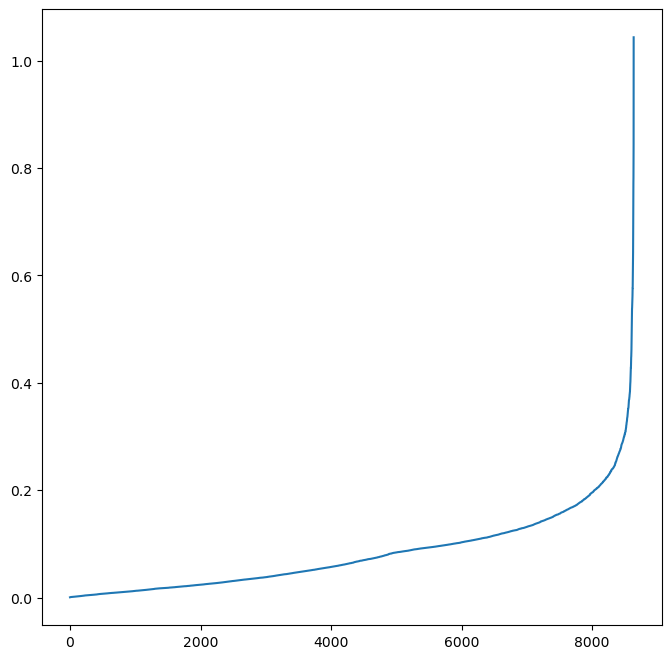

In [50]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(data_pro)
distance, index = neighbors_fit.kneighbors(data_pro)
distance = np.sort(distance, axis=0)
distance = distance[:, 1]

plt.figure(figsize=(8, 8))
plt.plot(distance)
plt.show()